In [1]:
# Goal: Use an LSTM neural network to predict the closing price of a stock using its past data.

In [2]:
# Using the yfinance API to get data (e.g., Apple - AAPL)

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# download 5 years of AAPL data
df = yf.download("AAPL", start="2018-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341888,40.351258,39.639313,39.850088,102223600
2018-01-03,40.334869,40.878196,40.271640,40.405128,118071600
2018-01-04,40.522217,40.625262,40.299735,40.407462,89738400
2018-01-05,40.983570,41.070220,40.526897,40.618231,94640000
2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200


In [6]:
# keep only the closing prices
data = df[['Close']].copy()
data.dropna(inplace=True)

In [7]:
data.head()

Price,Close
Ticker,AAPL
Date,
2018-01-02,40.341888
2018-01-03,40.334869
2018-01-04,40.522217
2018-01-05,40.983570
2018-01-08,40.831348


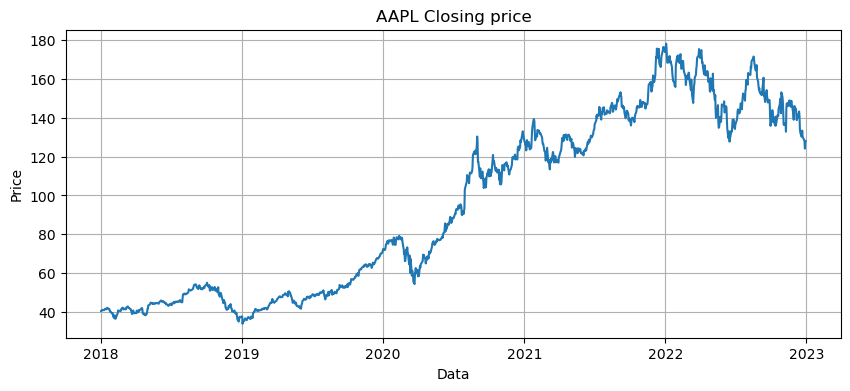

In [8]:
# plot the closing price
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("AAPL Closing price")
plt.xlabel("Data")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [9]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

In [10]:
# normalize  values to range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
# create time-series sequences
# using the last 60 days to predict the next day

In [12]:
import numpy as np

In [13]:
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# convert to numpy arrays
X = np.array(X)
y = np.array(y)

# reshape to (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1199, 60, 1)
y shape: (1199,)


In [14]:
# split into train and test sets

In [15]:
train_size = int(len(X) * 0.8)
X_train, X_test =  X[:train_size], X[train_size:]
y_train, y_test =  y[:train_size], y[train_size:]

In [16]:
# build and train the LSTM model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [18]:
# build the LSTM model
model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [19]:
# compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0337 - val_loss: 0.0039
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0026 - val_loss: 0.0054
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

In [20]:
# evaluate and plot predictions

In [21]:
# predict on test data
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [22]:
# inverse scale prediction
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

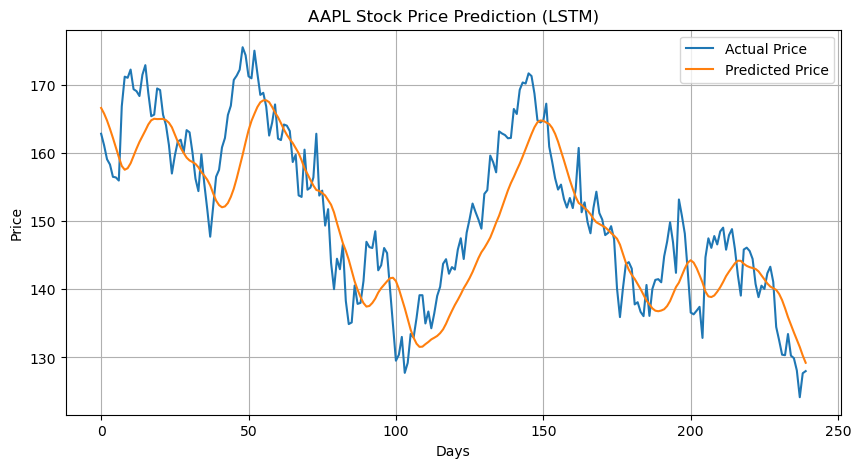

In [23]:
# plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('AAPL Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()